# Questions to ask?
* What factors can measured attributing to Purchases?
* Are certain factors more or less significant to Purchases?
* Can these factors be focused on for marketing campaign success? To increase potential of Purchases?
* Are the factors significant independently? In conjunction? 
* What is the most optimum factor for market segment penetration given the data? 

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import math
from scipy.stats import ttest_ind, ttest_ind_from_stats
from scipy.special import stdtr
from statsmodels.formula.api import ols

In [2]:
# Importing the dataset
df = pd.read_csv('Social_Network_Ads.csv')
X = df.iloc[:, [2, 3]].values
y = df.iloc[:, 4].values

In [3]:
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

* After importing the dataset, inspect the columns

In [4]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [6]:
df.shape

(400, 5)

In [7]:
df.corr()

,User ID,Age,EstimatedSalary,Purchased
User ID,1.000000,-0.000721,0.071097,0.007120
Age,-0.000721,1.000000,0.155238,0.622454
EstimatedSalary,0.071097,0.155238,1.000000,0.362083
Purchased,0.007120,0.622454,0.362083,1.000000


In [8]:
# Number of Purchases based on Age
r1= 0.622454

# Number of Purchased based on Estimated Salary
r2= 0.362083

In [9]:
# Calculate r squared (Pearson Coefficient)
r1_squared= r1**2
print (r1_squared)

r2_squared= r2**2
print (r2_squared)

0.38744898211599993
0.131104098889


In [10]:
# Total number of users
n= df.shape[0]
n

400

In [11]:
t1= (r1*((n-2)/(1-r1**2))**0.5)
print (t1)

t2= (r2*((n-2)/(1-r2**2))**0.5)
print (t2)

15.866373197621407
7.74935928630135


In [12]:
# Degrees of Freedom
d_f1= n-2
print (d_f1)


398


In [13]:
# P-Value Age
p_value1 = stats.t.sf(np.abs(t1), d_f1)*2  # two-sided pvalue = Prob(abs(t)>tt)
print (p_value1)

# P-Value Estimated Salary
p_value2 = stats.t.sf(np.abs(t2), d_f1)*2  # two-sided pvalue = Prob(abs(t)>tt)
print (p_value2)

2.80046007477e-44
7.77281925036e-14


In [14]:
df.Age.value_counts().head(1)

35    32
Name: Age, dtype: int64

In [15]:
df.EstimatedSalary.value_counts().head(1)

72000    12
Name: EstimatedSalary, dtype: int64

In [16]:
df.Purchased.value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [17]:
pd.crosstab(df.Age, df.Purchased).describe()

Purchased,0,1
count,43.000000,43.000000
mean,5.976744,3.325581
std,5.861449,3.190170
min,0.000000,0.000000
25%,1.000000,1.000000
50%,5.000000,3.000000
75%,9.000000,5.000000
max,29.000000,13.000000


In [18]:
pd.crosstab(df.EstimatedSalary, df.Purchased).describe()

Purchased,0,1
count,117.000000,117.000000
mean,2.196581,1.222222
std,2.396978,1.051363
min,0.000000,0.000000
25%,0.000000,0.000000
50%,1.000000,1.000000
75%,3.000000,2.000000
max,11.000000,4.000000


* After column inspection, take a view of the dataframe head (a sample of what the dataframe is)

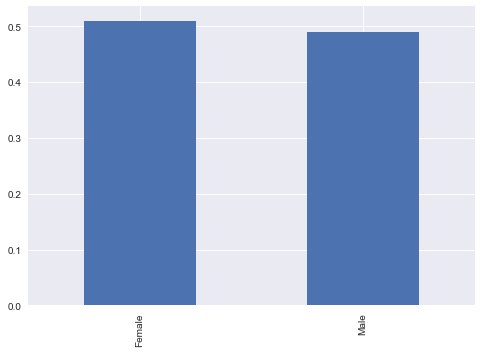

In [19]:
_= df['Gender'].value_counts('Purchased').plot(kind='bar')
plt.show()

* Initial exploratory analysis of Gender on Purchases to see if there is any significant impact. 
* It can be concluded that there is no significant impcat of Gender on Purchases.

### Gender does not display a significant impact on Purchase as there is only a slight difference between male and female purchasing occurence.
### The slight significance is that females have a slightly higher purchase rate occurrence than males but it is not enought to preclude targeting of females only.

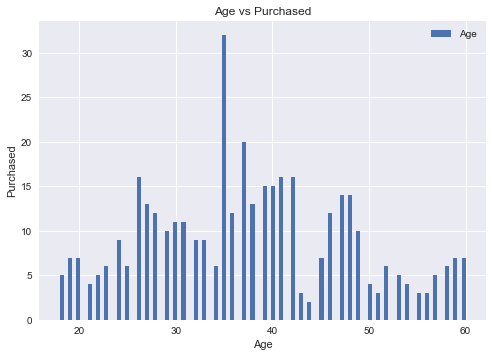

In [20]:
_= df.plot( x='Purchased', y='Age',bins=100, kind='hist')
_= plt.xlabel('Age')
_= plt.ylabel('Purchased')
_= plt.title('Age vs Purchased')
plt.show()

* In this histogram we can observe the impact of Age on Purchases. 
* We can see that there is distinct variations in purchasing volume based on age. 
* There is a very high peak of accurence for the mid 30's age group. 
* Overall from mid 20's to late 40's there seems to be the majority of the Purchases which would be one of the parameters for ad deployment.

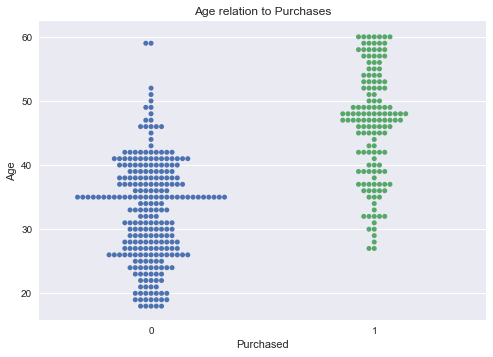

In [21]:
_= sns.swarmplot(x= 'Purchased', y= 'Age', data= df)
_= plt.title('Age relation to Purchases')
plt.show()

* Exploring the next factor, Age in repation to purchases.
* Here it can be seen that there are dense ranges of both Purchased and Not Purchased of Age.
* Some concern is the density of the Not Purchased frequency at the mid-30's. 
* This is excessively high and should be considered for evaluation. 

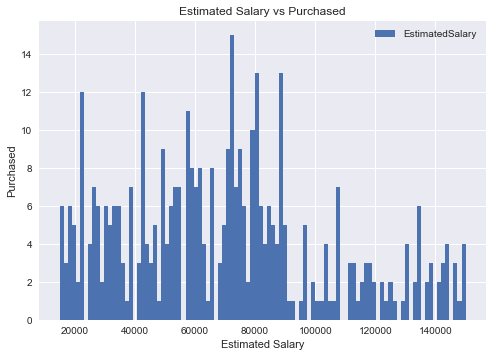

In [22]:
_= df.plot( x='Purchased', y='EstimatedSalary',bins= 100, kind='hist')
_= plt.xlabel('Estimated Salary')
_= plt.ylabel('Purchased')
_= plt.title('Estimated Salary vs Purchased')
plt.show()

* In this histogram we can observe the impact of Estimated Salary on Purchases. 
* We would assume that Estimated Salaray would be a key indicator based on purchasing power and ability but we can clearly see that there is a threshold to that statement.
* From $ 20,000 - $ 80,000 range we can see the bulk of purchases being made as well as there volumes. 
* It would not be a bad idea to still include the higher salaries in the target for ad deployment but if we were to exclusively focus on volume and number of purchases the observed range would be the ideal.


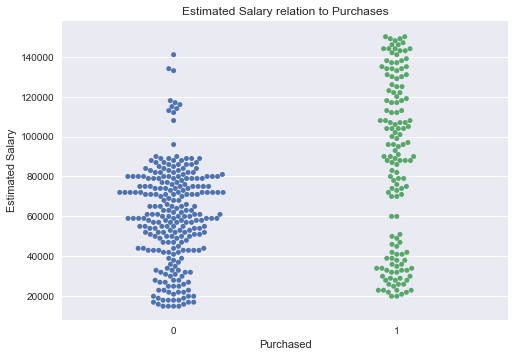

In [23]:
_= sns.swarmplot(x= 'Purchased', y= 'EstimatedSalary', data= df)
_= plt.ylabel('Estimated Salary')
_= plt.title('Estimated Salary relation to Purchases')
plt.show()

* From the swarm plot we see a consistent distribution of Purchased in relation to Estimated Salary.
* There is still a density in the Not Purchased that should be reconsidered on ad deployment.
* We can surmise that the Estimated Salary is of key interest to the campaign success.

In [24]:
# Estimate the model

mod = ols('df["Age"] ~ df["EstimatedSalary"]', df).fit(cov_type = "HC1")
mod.summary()

C:\Users\TimusLetap\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              df["Age"]   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     9.578
Date:                Thu, 07 Dec 2017   Prob (F-statistic):            0.00211
Time:                        11:03:53   Log-Likelihood:                -1502.1
No. Observations:                 400   AIC:                             3008.
Df Residuals:                     398   BIC:                             3016.
Df Model:                           1                                         
Covariance Type:                  HC1                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                34.3264      1.239     27.715      0.000      31.899      36.754
df["EstimatedSalary"]  4.773e-05   1.54e-05      3.095      0.002    1.75e-05     7.8e-05
==============================================================================
Omnibus:                       16.269   Durbin-Watson:                   0.836
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               10.909
Skew:                           0.275   Prob(JB):                      0.00428
Kurtosis:                       2.407   Cond. No.                     1.77e+05
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC1)
[2] The condition number is large, 1.77e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

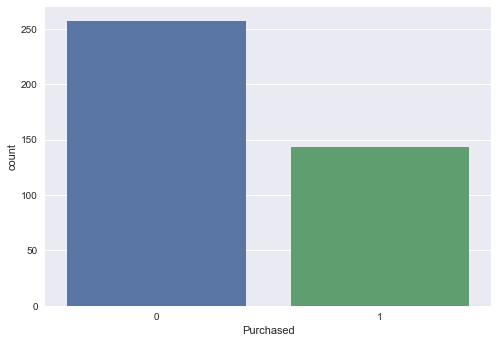

In [25]:
sns.countplot(x="Purchased", data = df)
plt.show()

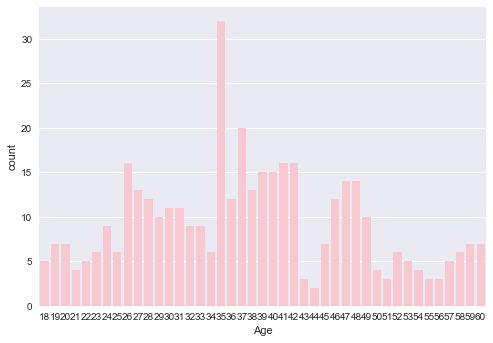

In [26]:
sns.countplot(x="Age", data = df,color = "pink" )
plt.show()

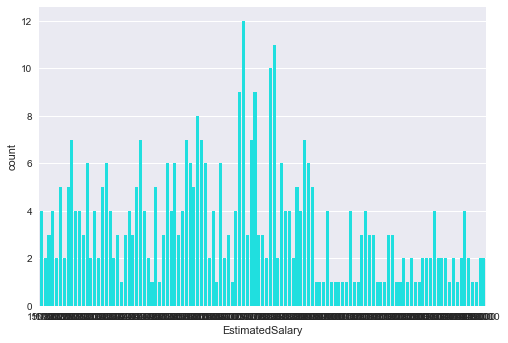

In [27]:
sns.countplot(x="EstimatedSalary", data = df,color = "aqua" )
plt.show()

In [28]:
df.EstimatedSalary.describe()

count       400.000000
mean      69742.500000
std       34096.960282
min       15000.000000
25%       43000.000000
50%       70000.000000
75%       88000.000000
max      150000.000000
Name: EstimatedSalary, dtype: float64

In [29]:
# Variables by Purchased
P= df[df['Purchased'] == 1]
NP= df[df['Purchased'] == 0]

# Sample Size by Purchased 
l_P= len(P)
l_NP= len(NP)
print ('Purchased=', l_P)
print ('Non Purchased=', l_NP)

# Ratio of Purchased
A_P= 43/l_P
ES_P= 117/l_P

[A_P, ES_P]

Purchased= 143
Non Purchased= 257


[0.3006993006993007, 0.8181818181818182]

In [30]:
# Variance
var_P= np.var(P)
var_NP= np.var(NP)

# Difference of means

mu_diff= (A_P - ES_P)


#Standard deviation
std_P= np.std(P)
std_NP= np.std(NP)

# Difference of Standard Deviations of sampling distributions
std_diff= (var_P/l_P)

# Critical t_value for 95%

t_crit= stats.t.ppf(0.975, l_P-1)
print(t_crit)

# Margin of Error
d= t_crit*std_diff

# 95% confidence interval
CI= [mu_diff-d, mu_diff+d]
CI

1.97681099362


[User ID           -6.944946e+07
 Age               -1.535621e+00
 EstimatedSalary   -2.428884e+07
 Purchased         -5.174825e-01
 dtype: float64, User ID            6.944946e+07
 Age                5.006559e-01
 EstimatedSalary    2.428883e+07
 Purchased         -5.174825e-01
 dtype: float64]

In [31]:
# Z-Score

z= mu_diff/std_diff
z

User ID           -1.472963e-08
Age               -1.004741e+00
EstimatedSalary   -4.211668e-08
Purchased                  -inf
dtype: float64

In [32]:
# Mean
mean_age= (np.mean(df['Age']))
print (mean_age)

# Variance
var_age= (np.var(df['Age']))
print (var_age)

#Standard deviation
std_age= (np.std(df['Age']))
print (std_age)

37.655
109.61597500000009
10.469764801560734


In [33]:
# Mean
mean_salary= (np.mean(df['EstimatedSalary']))
print (mean_salary)

# Variance
var_salary= (np.var(df['EstimatedSalary']))
print (var_salary)

#Standard deviation
std_salary= (np.std(df['EstimatedSalary']))
print (std_salary)

69742.5
1159696193.75
34054.3124104716


In [34]:
# T-test with alpha = 0.95
stats.t.interval(alpha = 0.95,              
                 df = 400, 
                 loc= df['Age'].mean())  

(35.68908765677061, 39.620912343229392)

In [35]:
# T-test with alpha = 0.95
stats.t.interval(alpha = 0.95,              
                 df = 400, 
                 loc= df['EstimatedSalary'].mean())  

(69740.534087656764, 69744.465912343236)

* T-test observation shows that the true mean Age lies somewhere between 35.7 and 39.6 and true mean for Estimated Salary lies somewhere between 69,740.53 and 69,744.47
* From our earlier calculations we can verify this as true since mean Age is observed at 37.66 and mean Estimated Salary is observed at 69,742.50

In [36]:
mean, sigma = np.mean(df['Age']), np.std(df['Age'])
conf_int_a = stats.norm.interval(0.95, loc=mean, scale=sigma)
conf_int_b = stats.norm.interval(0.95, loc=mean, scale=sigma / np.sqrt(len(df['Age'])))

conf_int_a
conf_int_b

(36.628981903116795, 38.681018096883207)

In [37]:
mean, sigma = np.mean(df['EstimatedSalary']), np.std(df['EstimatedSalary'])
conf_int_a2 = stats.norm.interval(0.95, loc=mean, scale=sigma)
conf_int_b2 = stats.norm.interval(0.95, loc=mean, scale=sigma / np.sqrt(len(df['EstimatedSalary'])))

conf_int_a2
conf_int_b2

(66405.238707860015, 73079.761292139985)

In [38]:
def ecdf(df):
    
    # Number of data points: n
    n = len(df)

    # a-data for the ECDF: x
    a = np.sort(df)

    # b-data for the ECDF: y
    b = np.arange(1, n+1) / n

    return a, b

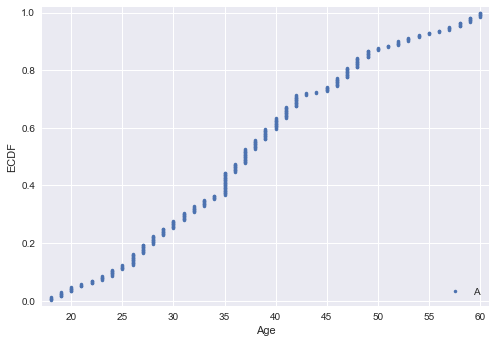

In [39]:
a1, b1 = ecdf(df['Age'])

# Generate plot
_ = plt.plot(a1, b1, marker='.', linestyle='none')

# Make the margins nice
plt.margins(0.02)

# Label the axes
_ = plt.xlabel('Age')
_ = plt.ylabel('ECDF')
_ = plt.legend(('Age'), loc= 'lower right')

# Display the plot
plt.show()

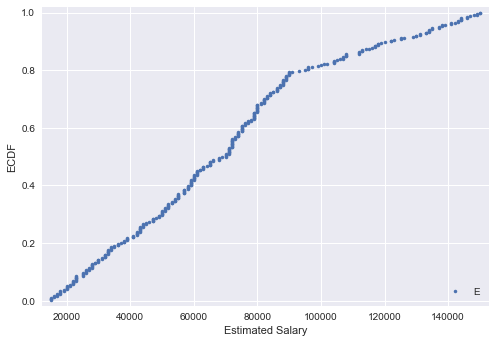

In [40]:
a2, b2 = ecdf(df['EstimatedSalary'])

# Generate plot
_ = plt.plot(a2, b2, marker='.', linestyle='none')

# Make the margins nice
plt.margins(0.02)

# Label the axes
_ = plt.xlabel('Estimated Salary')
_ = plt.ylabel('ECDF')
_ = plt.legend(('EstimatedSalary'), loc= 'lower right')

# Display the plot
plt.show()

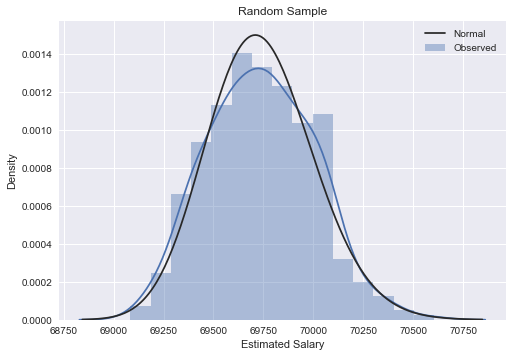

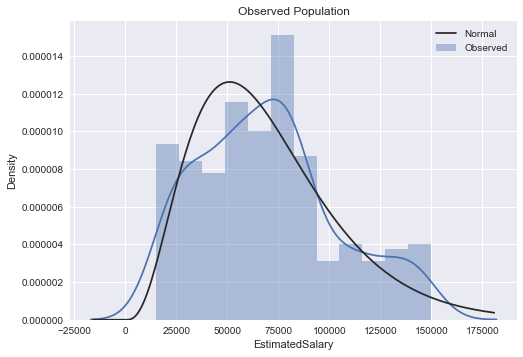

In [41]:
bought = np.random.gamma(mean_salary, size=400)
_= sns.distplot(bought, kde=True, fit=stats.gamma)
_= plt.xlabel('Estimated Salary')
_= plt.ylabel('Density')
_= plt.title('Random Sample')
_= plt.legend(('Normal', 'Observed'))
plt.show()


_= sns.distplot(df['EstimatedSalary'], kde=True, fit=stats.gamma)
_= plt.xlabel('EstimatedSalary')
_= plt.ylabel('Density')
_= plt.title('Observed Population')
_= plt.legend(('Normal', 'Observed'))
plt.show()

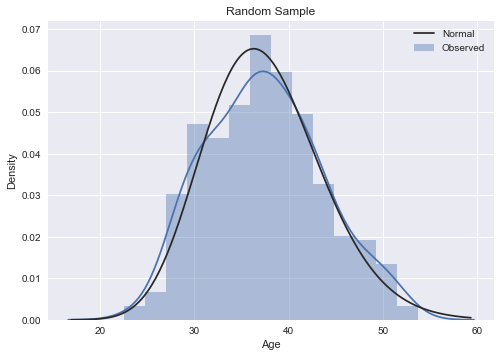

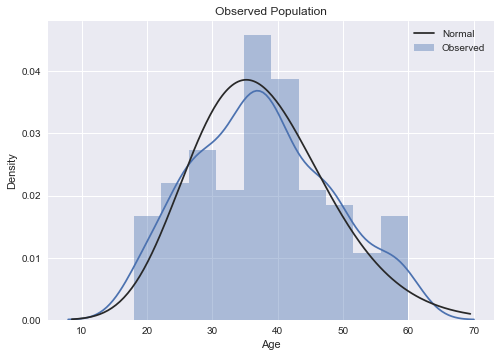

In [42]:
bought = np.random.gamma(mean_age, size=400)
_= sns.distplot(bought, kde=True, fit=stats.gamma)
_= plt.xlabel('Age')
_= plt.ylabel('Density')
_= plt.title('Random Sample')
_= plt.legend(('Normal', 'Observed'))
plt.show()


_= sns.distplot(df['Age'], kde=True, fit=stats.gamma)
_= plt.xlabel('Age')
_= plt.ylabel('Density')
_= plt.title('Observed Population')
_= plt.legend(('Normal', 'Observed'))
plt.show()

In [43]:
# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

C:\Users\TimusLetap\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\TimusLetap\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


In [44]:
# Fitting classifier to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [45]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [46]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [47]:
cm

array([[64,  4],
       [ 3, 29]])

In [48]:
# Accuracy
Accuracy = (64+29)/(64+4+3+29)
print ('Accuracy=', Accuracy)

Accuracy= 0.93


* From the confusion matrix we can observe that the number of False positives and False negatives is relatively low which is to say that our data is relatively accurate as there is a 93% accuracy.
* The data we are observing has an accuracte and correlating value.

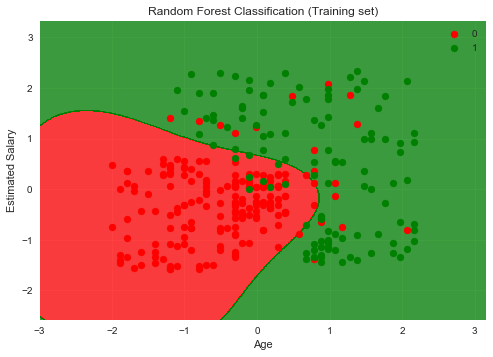

In [49]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Random Forest Classification (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

* The observations of our training set are the values from our actual data which reflect some inconsistencies and overlaps in the Gaussian observation.
* The red is non-purchases and green are purchases, we can instanlty see that the fit has some inconsistencies in our actual data.

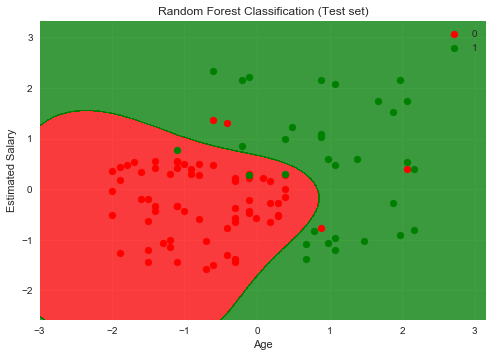

In [50]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Random Forest Classification (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

* This is our predictive analysus with a simulated observation from our training set. 
* Here we can visualize a more accurate fit of the Gaussian kernel on our test set. 
* There are some observations that overlap but they are far fewer and more consistent to the actual curve. 
* These outliers are consistent with our confusion matrix predictions. 
* We can safely assume that the classifiers of Age and Estimated Salary do have significane with Purchases. 


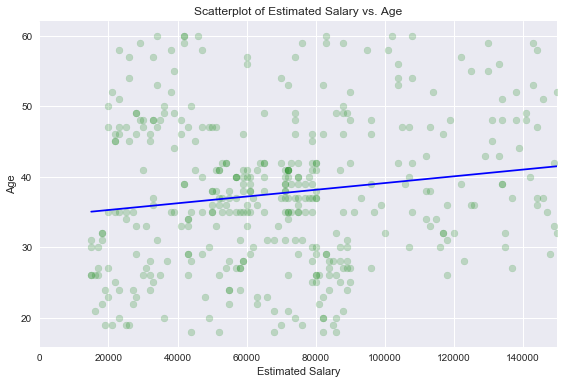

In [51]:
# store fit results in clearer labels
intercept = mod.params[0]
slope = mod.params[1]

# regenerate improved scatter plot

# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
o = df['EstimatedSalary']
p = df['Age']

fig, ax = plt.subplots()
ax.scatter(o, p,alpha=0.2, c= 'green')

points = np.linspace(df['EstimatedSalary'].min(), df['EstimatedSalary'].max())
plt.plot(points, slope*points + intercept, c= 'blue')

ax.set_xlim([0, max(o)])
ax.set_xlabel('Estimated Salary')
ax.set_ylabel('Age')
ax.set_title('Scatterplot of Estimated Salary vs. Age')

ax.grid(True)
fig.tight_layout()
plt.show()

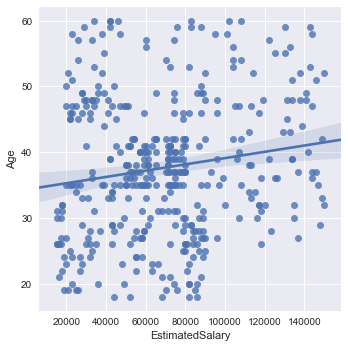

In [52]:
sns.lmplot(x="EstimatedSalary",y="Age",ci=95,data =df)
plt.show()

* Correlation plot shows the regression line with a positive relationship to Age with respect to Estimated Salary
* Estimated Salary can be seen as very dispersed with concentrated pockets 
* from the above graph we can verify the high concentration of points from Estimated Salary of $40,000 - $80,000 approximately with density of Age in 35 to 38 approximated
* In terms of targeting the widest variety and most expansive segment with probability of results, Estimated Salary should be the factor used

In [53]:
import statsmodels.formula.api as sm
model = sm.ols(formula='df.Purchased~ df.EstimatedSalary+df.Age', data=df)
fitted = model.fit()
print (fitted.summary())

                            OLS Regression Results                            
Dep. Variable:           df.Purchased   R-squared:                       0.460
Model:                            OLS   Adj. R-squared:                  0.457
Method:                 Least Squares   F-statistic:                     168.9
Date:                Thu, 07 Dec 2017   Prob (F-statistic):           8.61e-54
Time:                        11:03:58   Log-Likelihood:                -150.26
No. Observations:                 400   AIC:                             306.5
Df Residuals:                     397   BIC:                             318.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -0.9096      0

In [54]:
# Import necessary modules
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Instantiate a ridge regressor: ridge
ridge = Ridge(alpha=0.5, normalize=True)

# Perform 5-fold cross-validation: ridge_cv
ridge_cv = cross_val_score(ridge,X, y, cv=5)

# Print the cross-validated scores
print(ridge_cv)

[ 0.35846836 -0.49447785  0.35041567  0.24423586  0.07339417]


In [59]:
# Import necessary modules
from sklearn.preprocessing import Imputer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Setup the pipeline steps: steps
steps = [('imputation', Imputer(missing_values='NaN', strategy='most_frequent', axis=0)),
        ('SVM', SVC())]

# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

# Fit the pipeline to the train set
pipeline.fit(X_train, y_train)

# Predict the labels of the test set
y_pred1 = pipeline.predict(X_test)

# Compute metrics
print(classification_report(y_test, y_pred1))

             precision    recall  f1-score   support

          0       0.62      0.96      0.76        73
          1       0.62      0.11      0.18        47

avg / total       0.62      0.62      0.53       120



In [57]:
# Import the necessary modules
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

# Setup the pipeline steps: steps
steps = [('scaler', StandardScaler()),
        ('svm', SVC())]
        
# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.3, random_state=42)

# Fit the pipeline to the training set: svm_scaled
svm_scaled = pipeline.fit(X_train, y_train)

# Instantiate and fit a SVM classifier to the unscaled data
svm_unscaled = SVC().fit(X_train, y_train)

# Compute and print metrics
print('Accuracy with Scaling: {}'.format(svm_scaled.score(X_test, y_test)))
print('Accuracy without Scaling: {}'.format(svm_unscaled.score(X_test, y_test)))

Accuracy with Scaling: 0.9416666666666667
Accuracy without Scaling: 0.625


C:\Users\TimusLetap\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


In [60]:
from sklearn.grid_search import GridSearchCV
# Setup the pipeline
steps = [('scaler', StandardScaler()),
         ('SVM', SVC())]

pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'SVM__C':[1, 10, 100],
              'SVM__gamma':[0.1, 0.01]}

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

# Instantiate the GridSearchCV object: cv
cv = GridSearchCV(pipeline, parameters)

# Fit to the training set
cv.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred2 = cv.predict(X_test)

# Compute and print metrics
print("Accuracy: {}".format(cv.score(X_test, y_test)))
print(classification_report(y_test, y_pred2))
print("Tuned Model Parameters: {}".format(cv.best_params_))

Accuracy: 0.9
             precision    recall  f1-score   support

          0       0.91      0.95      0.93        56
          1       0.86      0.79      0.83        24

avg / total       0.90      0.90      0.90        80

Tuned Model Parameters: {'SVM__C': 1, 'SVM__gamma': 0.1}


C:\Users\TimusLetap\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)
C:\Users\TimusLetap\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)
C:\Users\TimusLetap\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)
C:\Users\TimusLetap\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)
C:\Users\TimusLetap\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with in

[[100   0]
 [ 60   0]]
             precision    recall  f1-score   support

          0       0.62      1.00      0.77       100
          1       0.00      0.00      0.00        60

avg / total       0.39      0.62      0.48       160



C:\Users\TimusLetap\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


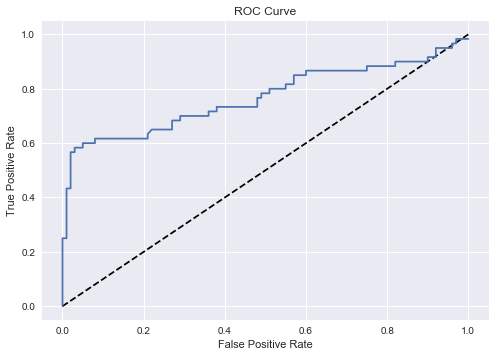

In [61]:
# Import the necessary modules
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .4, random_state=42)

# Create the classifier: logreg
logreg = LogisticRegression()

# Fit the classifier to the training data
logreg.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred3 = logreg.predict(X_test)

# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred3))
print(classification_report(y_test, y_pred3))

# Import necessary modules
from sklearn.metrics import roc_curve

# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(1-fpr, 1-tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

* The ROC indicates that the accuracy is lost as the curve approaches the diagonal, increasing sensitivity decreased specificity.
* Initially accurate and then decreases as it loses area under curve

# Conclusion
* The data shows that there is greater significance of Estimated Salary on Purchases
* Prioritizing Estimated Salary factor for the campaign will provide better success rate 
* Estimated Salary as a factor encompasses Age attributes because Estimated Salary is a not independent of Age
* Since the attribute of Estimated Salary in most cases allows for the assumption of legal age this helps with the selection of customer base (legal age and ability to purchase)
* As a business decision, Estimated Salary should be emphasized over Age for Purchase impact as it provides the most ideal observations 
* The Age attribute is still viable but not as rewarding to pursue for market segement penetration as there are limitaitons to number of populous accessible
* Estimated Salary is promising to pursue due to its vast range
* When combined both Age and Estimated Salary can provide for targeted sales with consideration to prototypes or new product testing
* With scaling and parameter tuning we can increase the accuracy of the dataset for better observations analysis and prediction. 
* A larger sample size should be prioritized before making larger decisions, but based upon the data provided this was the ideal assumptions that can be made. 